**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : Sarah Siage <br/>
Numéro d'étudiant : 300 228 396

# Analyse Exploratoire

## Importer les bibliothèques importantes


In [4]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Lire un de données

Comme indiqué dans la description du devoir, il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


In [16]:
glass_data_1 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/01/glass.csv"
derm_data_2 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/02/dermatology_database_1.csv"
risk_data_3 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
car_data_4 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/04/car.data"
wine_data_5 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/05/WineQT.csv"
p16_data_6 = "https://github.com/superd0nna/Devoir1-AI/blob/main/data/a1/06/16P.csv"
credit_data_7 = "https://raw.githubusercontent.com/superd0nna/Devoir1-AI/refs/heads/main/data/a1/07/test.csv"


dataset = pd.read_csv(wine_data_5) # to read a different dataset, you need to give it a different var (defined on top)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?

    1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.



<u>ANSWERS</u>: <i>Analyse des valeurs manquantes</i>

1.1) Based on the data sets, the following files had missing values:<br/>
- Dermatology (derm_data_2)  
  - Age

- Credit (credit_data_7)  
  - Name  
  - Monthly_Inhand_Salary  
  - Type_of_Loan  
  - Num_of_Delayed_Payment  
  - Num_Credit_Inquiries  
  - Credit_History_Age  
  - Amount_invested_monthly  
  - Monthly_Balance        

In [17]:
# We want to know which data and their attributes that have missing values
missing_values = dataset.isnull().sum() + (dataset == '?').sum() + (dataset == '').sum()
missing_values[missing_values>0]

Series([], dtype: int64)

1.2) To know which dataset has the missing values, you need to adjust the code under "Lire un donnée". After reading the data set using the code above, I began the implementation. More specifically, I used the isnull() function to find missing values represented by NaN, searched for the "?" symbol, and empty strings. I did the summation of these three elements and if the value was greater than 0, then I would return the attribute and the number of times it had the missing values. 

1.3) The approach that should be used is very case specific, as each attribute needs to be completed based on its type, distribution, and relationship with other variables. For example, numeric attributes can be replaced using statistical methods like the mean, median, or even regression models, whereas categorical attributes may require adjustments based on the mode or classification techniques. Additionally, more advanced methods such as predictive modeling (e.g., using machine learning algorithms) can be employed to infer missing values based on patterns in the data. 
- Dermatology
    - Age: 
      - numerical --> using mean or median can preserve the overall age distribution

- Credit (credit_data_7)  
  - Name
      - categorical --> consider creating a new group as a placeholder (e.g., "unknown"). This placeholder can help easily identify the missing records
  - Monthly_Inhand_Salary  
      - numerical --> using mean/median allows the dataset to maintain its numerical integrity.
  - Type_of_Loan
      - categorical --> Replace missing values with the mode (most common loan type to preserve the distribution) or a placeholder like “Unknown”.
  - Num_of_Delayed_Payment  
      - numerical --> mean or median number of delayed payments.
  - Num_Credit_Inquiries  
      - numerical --> this is a numerical variable that should reflect general trends, use the mean or median number of inquiries
  - Credit_History_Age  
      - numerical --> mean or median age of credit history.
  - Amount_invested_monthly  
      - numerical -->  Replace missing values with the mean or median investment amount.
  - Monthly_Balance 
      - numerical --> missing values with the mean or median monthly balance.

Overall, the approach is similar:
 - Numerical Attributes: Replace missing values with statistical measures like the mean or median to preserve data integrity and central tendency.
 - Categorical Attributes: Impute missing values using the mode (most common category) or try adding a placeholder to maintain the context and identify missing records.


---

2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


<u>ANSWERS</u>: <i>Sélectionnez et familiarisez-vous avec une tâche de classification</i>

2.1) The purpose of this task to predict the quality of red variants of Portugese wine using chemical properties. 

This information can be used for classification, where users can refer to the chemical properties of the wine and assign a quality score (0-10). Furthermore, it can be used for regression tasks, where users can predict the quality of the wine given an input.

Personally, I don't consider myself being an expertise in this domain as I am unsure of the specific qualitites that make a good wine. Having a backgorund in data analysis or chemical testing would be considered an asset in this domain, as they would be able to have a clearer understanding in the relationship between chemical properties and quality. However, there exists modeling tools that are able to disclose these correlations, where I would be able to make a conclusion and manipulate the data to understand its meaning.

---


3. **Analyse des attributs** : 

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.

    3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.


<u>ANSWERS</u>: <i>Analyse des attributs</i>

3.1) In order to improve the efficiency of the data analysis, it would be important to considering removing attributes that have slight variance. Variance measures how spread out values in a column are from the mean. Having a low variance would not be important for us since it will provide little discriminative power for a model. Another key aspect is to consider columns that have a lot of missing values. However, we have already discovered for this dataset that there are no missing values. 
- after running the code, we can see that the "chlorides" and "density" columns have a variance near 0 (compared to the other columns). That being said, they can be ignored in our dataset as the values are too similar in value.

In [18]:
# calculate the variance of the data set to see which attributes can be ignored
df = pd.DataFrame(dataset)
variance  = df.var()
remove_attr = variance[variance < 0.01] # closer it is to 0, the less value it will bring us
remove_attr


chlorides    0.002234
density      0.000004
dtype: float64

3.2) The following code has been used to create the histograms. After analyzing the output, we can see a few key traits that should be highlighted:
- The quality is unbalanced, we can see that the majority of the wine can be found at a rating of 5 and 6. 
- The Density and pH diagrams are both symmetric (unimodel). Their values are very similar.
- The following graphs are skewed towards the right: fixed acidity, volatile acidity, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol. In this distribution, the mean is typically greater than the median, suggesting that the average may not accurately represent the typical value in the dataset.
    - Fixed acidity and volatile acidity are most similar to each other
    - Free sulfur dioxide and total sulfur dioxide are most similar to each other
    - Sulphates seem to be more distinct, but still similar to the right skewed diagrams, same with the alcohol diagram.
- Residual sugar and chlorides are are very similar in shape, there they peak in the beginning of the diagram and then fall short as the x value increases. It can be categorized as right skewed as well.
- Citric acid is closest to a uniform distribution

Uniform distribution -->  suggests that every value has roughly the same likelihood of occurring, indicating a lack of trends or patterns within the data, and it often implies that the data is generated by a random process without any underlying structure. </br>
Right-skewed --> there are a significant number of lower values and a few higher outliers, which may suggest that most observations fall below the average. </br>
Symmetric --> signifies that the data is evenly distributed around the mean, suggesting that the dataset follows a normal distribution. This often implies that the mean and median are close in value and that standard statistical methods can be appropriately applied.

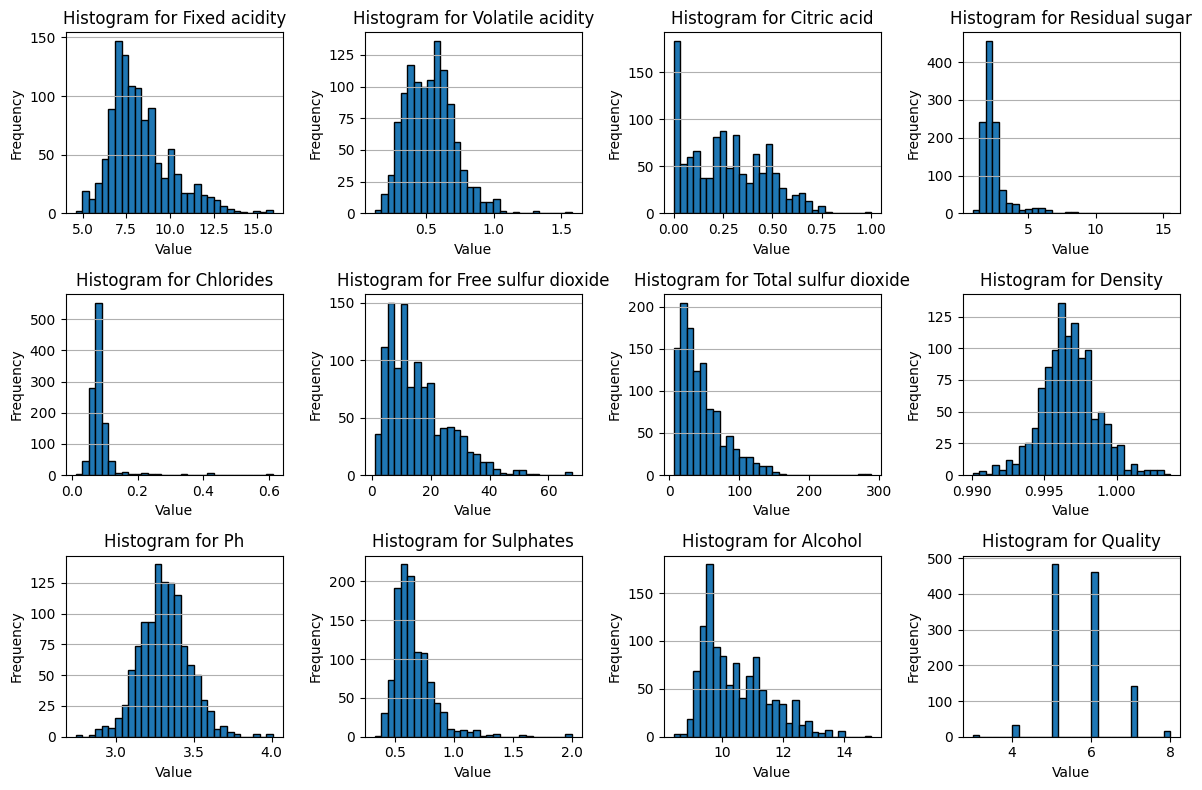

In [19]:

# List of column names to create histograms for
columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]

# To display the histograms closer to each other
cols = 4
rows = 3

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8)) # to create the subplots in the figure
axes = axes.flatten()  # easier to iterate and create the histograms (2D --> 1D)

# Create histograms for each column
for i, column in enumerate(columns):
    axes[i].hist(df[column].tolist(), bins=30, edgecolor='black')  
    axes[i].set_title(f'Histogram for {column.capitalize()}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')  # to aid with readibility of data


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

---

4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


<u>ANSWERS</u>: <i>Analyse de la distribution des classes</i>

4) Based on the diagram, we can see that this dataset is unbalanced. The majority of the data is centered on the wine quality being a 5 (approx 490 wines) and 6 (approx 475 wines). Other quality ratings such as 0, 1, 2, 9 and 10 seem to have no wine that is placed in such rating. The remaining ratings (3, 4, 7 and 8), have much fewer than the 5 and 6 quality ratings, the highest being ~175 wines which is significantly smaller than the wine count of ~500. Since the number in the majority class is much greater than those in the minority class, this has concluded that the dataset is unbalanced.

The data set is unbalanced


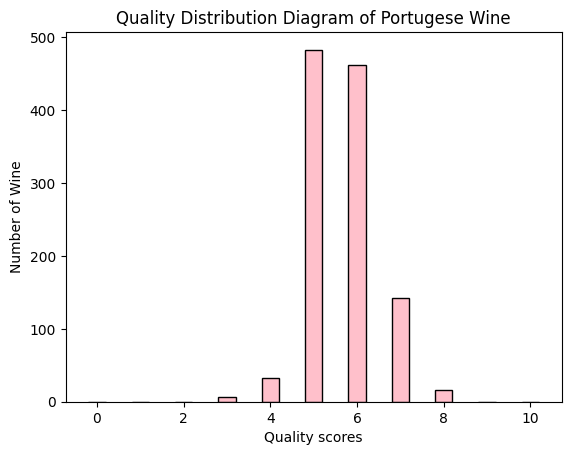

In [29]:
quality_count = df['quality'].value_counts()
x = list(range(11))
y = [quality_count.get(i, 0) for i in x]

plt.bar(x, y, color='pink', edgecolor='black', width=0.4)
plt.title('Quality Distribution Diagram of Portugese Wine')
plt.xlabel('Quality scores')
plt.ylabel('Number of Wine')

# Sources say if the minority class in your dataset constitutes less than 10-20% of your total data, it can be considered imbalance
if quality_count.min() / quality_count.max() < 0.1:
    print("The data set is unbalanced")
else:
    print("The data set is balanced")

---

5. **Prétraitement** : 

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).


<u>ANSWERS</u>: <i>Prétraitement </i>

5.1) Standardization is  the best transformation for numerical attributes because it centers the data around a mean of 0 and scales it to have a standard deviation of 1, ensuring that all features contribute equally to the model. This is particularly beneficial when the data follows a bell-shaped distribution or when features are measured on different scales, as it enhances model performance and interpretability. Below is an example of the distribution of ‘total sulfur dioxide’ before and after the standardization transformation. Standardization can also be beneficial for right-skewed histograms (like 'total sulfure distribution' attributes) by transforming the data to reduce skewness, which helps in achieving a more normal distribution. By centering the data around a mean of 0 and scaling it, standardization can mitigate the effects of extreme values and make the data more symmetric, thereby improving the performance of machine learning models that assume normally distributed input features.

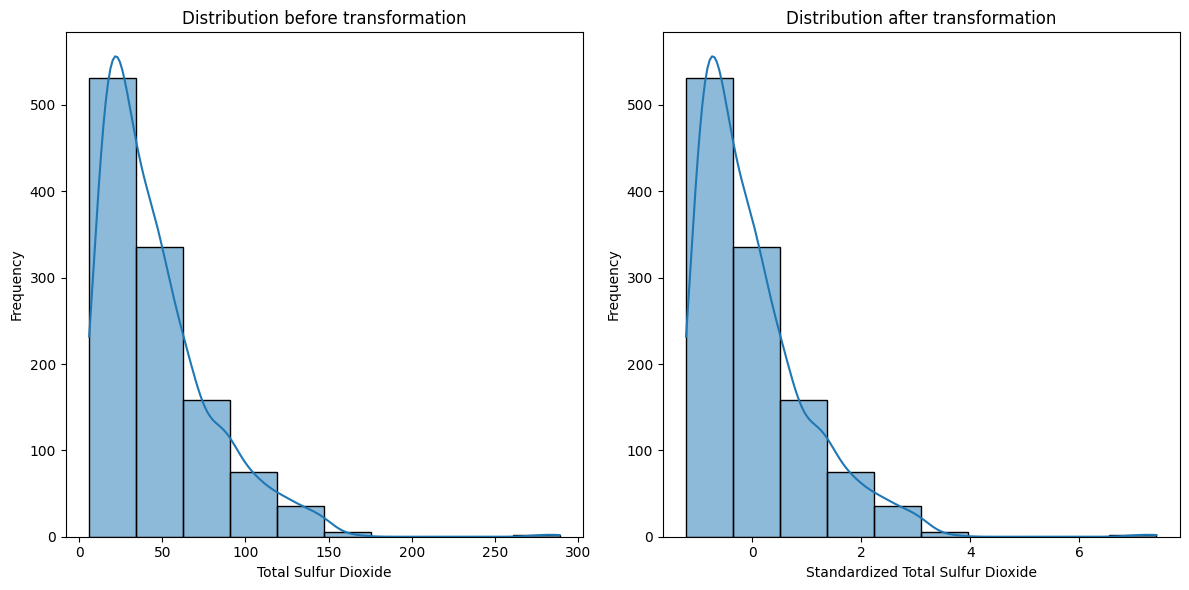

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['total sulfur dioxide'], bins=10, kde=True)
plt.title('Distribution before transformation')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')

# Standardization
scaler = StandardScaler()
df['total_sulfur_dioxide_standardized'] = scaler.fit_transform(df[['total sulfur dioxide']])

# Visualizing the distribution after transformation
plt.subplot(1, 2, 2)
sns.histplot(df['total_sulfur_dioxide_standardized'], bins=10, kde=True)
plt.title('Distribution after transformation')
plt.xlabel('Standardized Total Sulfur Dioxide')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

5.2) The use of one-hot encoding is ideal for categorical data to transform it into numerical format, allowing algorithms to effectively process and analyze the data. Since my dataset does not have categorical attributes, I chose to create a new class for quality, called “Rating,” where I assigned each wine a label: “excellent” for quality scores greater than 5, “normal” for a quality score of 5, and “poor” for scores less than 5. This transformation provides a meaningful categorization of wine quality that can be easily interpreted and utilized in further analysis.

After establishing these categories, the one-hot encoding method was applied to convert the “Rating” class into a binary format, creating separate binary columns for each label. This ensures that the relationships among categories are maintained while preventing any ordinal assumptions about the quality scores. By using one-hot encoding, we can efficiently incorporate the categorical data into machine learning models, improving their performance and interpretability.

In [33]:
# Function to create a new categorical attribute in the dataset
def classify_quality(quality):
    if quality < 5:
        return 'Poor'
    elif quality == 5:
        return 'Normal'
    else:
        return 'Excellent'

# Apply the classification function
df['rating'] = df['quality'].apply(classify_quality)
print('Dataset table after adding the new column')
print(df['rating'])

# Initialize OneHotEncoder for the rating variable
encoder = OneHotEncoder(sparse_output=False) 

# Fit and transform the 'rating' column
rating_values = df[['rating']]  # Selecting the 'rating' column as a DataFrame
one_hot_quality = encoder.fit_transform(rating_values)

# Convert the resulting array into a DataFrame
encoded_df = pd.DataFrame(one_hot_quality, columns=encoder.get_feature_names_out(['rating']))

# Display the one-hot encoded DataFrame for the quality classification
print("\nOne-Hot Encoded Quality Classification:")
print(encoded_df)

Dataset table after adding the new column
0          Normal
1          Normal
2          Normal
3       Excellent
4          Normal
          ...    
1138    Excellent
1139    Excellent
1140       Normal
1141    Excellent
1142       Normal
Name: rating, Length: 1143, dtype: object

One-Hot Encoded Quality Classification:
      rating_Excellent  rating_Normal  rating_Poor
0                  0.0            1.0          0.0
1                  0.0            1.0          0.0
2                  0.0            1.0          0.0
3                  1.0            0.0          0.0
4                  0.0            1.0          0.0
...                ...            ...          ...
1138               1.0            0.0          0.0
1139               1.0            0.0          0.0
1140               0.0            1.0          0.0
1141               1.0            0.0          0.0
1142               0.0            1.0          0.0

[1143 rows x 3 columns]


---

6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.


<u>ANSWERS</u>: <i>Données d’entraînement et cible </i>


In [34]:
df = pd.DataFrame(dataset)

# Define X as the informative features - the target class
X = df.drop('quality', axis=1)

# Define y as the target class (quality)
y = df['quality']

# Display the first couple of rows of X and y
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  
0      9.4   0  
1      9.8   1  
2      9.8   2  
3   

---

7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


<u>ANSWERS</u>: <i>Ensembles d’entraînement et de test </i>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training info:", X_train.shape) # returns number of samples, number of features
print("Testing set features shape:", X_test.shape) # dimension of the testing feature set
print("Training target set shape:", y_train.shape) # dimension of the training target set
print("Testing target set shape:", y_test.shape) # dimensions of the testing target set

Training info: (914, 12)
Testing set features shape: (229, 12)
Training target set shape: (914,)
Testing target set shape: (229,)


---



# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

	1.	Subhak, P. (2021, November 18). Handling missing values in dataset: 7 methods that you need to know. Medium. https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62
	2.	Siddiqi, F. (2021, August 8). How can I determine if my data is balanced or imbalanced? Medium. https://medium.com/@faheemsiddiqi789/how-can-i-determine-if-my-data-is-balanced-or-imbalanced-080819af408c#:~:text=Consider%20the%20threshold%3A%20There%20is,data%20is%20often%20considered%20imbalanced.
	3.	BYJU’S. (n.d.). Histogram. BYJU’S. https://byjus.com/maths/histogram/
	4.	Yasser H. (2023). Wine quality dataset. Kaggle. https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
	5.	GeeksforGeeks. (n.d.). Working with missing data in Pandas. https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
	6.	Stack Exchange. (2021, December 7). Determining whether a dataset is imbalanced or not? Data Science Stack Exchange. https://datascience.stackexchange.com/questions/122571/determining-whether-a-dataset-is-imbalanced-or-not#:~:text=There%20isn’t%20a%20universally,it%20can%20be%20considered%20imbalanced.
	7.	W3Schools. (n.d.). Matplotlib histograms. https://www.w3schools.com/python/matplotlib_histograms.asp
	8.	DataFlair. (2021, April 20). Train-test set in Python ML. DataFlair. https://data-flair.training/blogs/train-test-set-in-python-ml/
--- 
## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".